In [100]:
from scipy.stats import norm
from math import exp,sqrt
import numpy as np
import pandas as pd
from matplotlib import cm

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import SVG

This practical assignment is composed of two parts, each of which has a number of separate questions. 

# Part 1: Signal Detection Theory


In class, we briefly spoke about signal detection theory, which is a model that uses hit- and false alarm rates to  determine an underlying sensitivity and decision criterion. 
The equations were mentioned but in this assignment we will look at how derive these equations from the SDT framework.
To be clear, we are talking about the equation for the sensitivity:  

$$
	d' = Z(P_{hit}) - Z(P_{FA}))
$$
...and the equation for the decision criterion:
$$
	c = - \frac{Z(P_{hit}) + Z(P_{FA}))}{2}
$$

The SDT framework assumes that both signal and noise have a `signal strength` that is represented as  a normal distribution with the same shape. 
The detector sets a criterion $\beta$, and every trial where a strength is observed that is greater than $\beta$, the detector concludes that a signal was present.
The cause for errors (`false alarms` and `misses`) is that these distributions overlap to a certain extent. The more overlap, the more errors.

![](SDT_drawings.svg)

Parameter $d'$ indicates the distance between the signal- and noise distribution, which reflects the extent to which the observer can dissociate the signal from the noise -- i.e. sensitivity. 
This number is expressed in $z$, so that $d' = 1.5$ implies that the distributions are 1.5 standard deviations away from each other.

An unbiased detector would place $\beta$ right in between the two distributions of signal and noise. 
However, detectors are rarely unbiased, for various reasons. Instead, they have a displacement $c$, which can be positive (i.e. **less** inclined to decide `signal`) or negative (**more** so inclined).


### Some functionality:

signal detection theory calculation

In [11]:
Z = norm.ppf     
# This function turns 'proportions' into z-scores:
# Z(.5) = 0.0
# Z(.75) = 0.674
# Z(.1581) = -1.0

def sdt(hit_rate, fa_rate):
    """
    This function takes a hit rate and a false alarm rate, and computes d_prime and c
    """
    out = dict()
    out['d_prime'] = Z(hit_rate) - Z(fa_rate)
    out['criterion'] = -(Z(hit_rate) + Z(fa_rate))/2
    return out

# Example:
# print sdt(hit_rate=.75, fa_rate=.1)

print(sdt(hit_rate=10/15, fa_rate=3/15))

# drawing of d' == 0
# drawing of d' == 1.0, c=0
# drawing of d' = 1.0, c = 0.25.

{'d_prime': 1.2723485328683717, 'criterion': 0.20544696713872837}


And, plotting Gaussians for your figures; you can use the code below as an example.

In [5]:
def draw_gauss(m,  s, ax, c, label='', rnge=[-5,5]):
    """
    draws a gaussian at x, with sd s in the specified axis using color c
    """
    x = np.linspace(rnge[0], rnge[1], 1000)
    ax.plot(x, norm.pdf(x, loc=m, scale=s), c=c, label=label)

In [12]:
# we define some parameters for our example plot using the above function
s = sqrt(2)
mean_diff = 2
criterion = 1.6

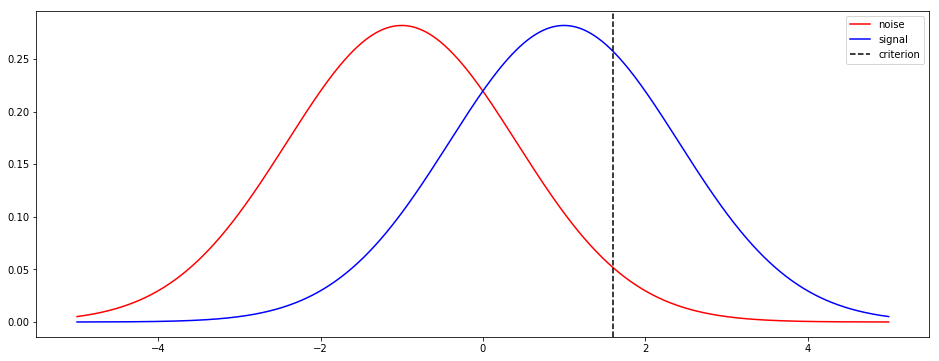

In [14]:
# First of course make a figure
f, ax = plt.subplots(1, 1, figsize=(16,6))

# and then draw normal distributions
draw_gauss(m=-mean_diff/2, s=s, ax=ax, c='r', label='noise')
draw_gauss(m=mean_diff/2, s=s, ax=ax, c='b', label='signal')

# and, we can also plot 'c', the criterion value in the plot
ax.axvline(x=criterion,  color='k', linestyle='--', label='criterion') 
plt.legend();

## Questions on SDT

Answer these questions using separate code or markdown cells, depending on the question. If you want to explain yourself (or answer the questions using text), use a markdown cell for this. Example code and markdown cells are provided, and you can copy/paste those. 

1. With $d = 0$, there is no difference between the distributions of signal and noise. Make a drawing of this scenario. What is the expected proportion of hits and false alarms? Put these in the title of the figure using `ax.set_title('Hit Rate: , False Alarm Rate: ')`. You can check your answer with the function `sdt` defined above.
2. Now make a drawing of the situation with $d' = 1.0, c = 0$. 
	What happens with the hit rate and the false alarm rate when d' is increased? What happens to the **difference**  between the hit rate and the false alarm rate? 
3. Add a new line for a new $c$ (criterion) to your figure in the previous drawing, reflecting the scenario: $d' = 1.0, c = 0.25$. 
	What do you think this shift in $c$ does to $Z(P_{hit})$, and $Z(P_{FA})$ respectively?
	
    You should now have a reasonable understanding of the formula for $d'$, and why its calculation does **not** depend on the bias (criterion) $c$ .
4. To gain a better understanding of the definition of $c$, have another look at the situation $d'$ = 1.0, $c$ = 0. How does $Z(P_{hit})$ relate to $Z(P_{FA})$, regardless of the value of $d'$ ?
5. If $c$ decreases to -0.25, what happens to $Z(P_{hit})$? What happens to $Z(P_{FA})$?
	
    You should now have a reasonable understanding of the formula for $c$
6. Paul does an experiment where people see dynamic noise for 3s, and participants have to indicate whether they saw a '+' which appears on half of the trials. 
	In the first block, the '+' can appear anytime between $t=1000ms$ and $t=2500ms$.
    
	In another block of the experiment, Paul instructs the participants that the '+', when present, appears at $t=2000ms$ at every trial.
    
	Paul finds that participants are 81.3% accurate in the first block, and 92.4% accurate in the second block (t-test $p< 0.005$), and writes this result up in a paper titled *"Top-down controlled temporal attention impacts Visual Sensitivity"*. 
    
	Explain to Paul, in your own words, why his conclusions are premature.
7. **BONUS** One of the critical assumptions of SDT is that the distributions of `signal` and `noise` have the same shape. 
	Give a reason, in your own words, why this assumption is often considered justified.
    

In [7]:
#### EXAMPLE CODE CELL ####

#### EXAMPLE MD CELL: Answer to question 1

Here, we could write some text to explain what we've just done....

# Part 1: Decision-making models

SDT is the backbone of decision-making and can explain a lot of the vagaries of human decisions. But some aspects are not covered by this simplest of models. Here, we will focus on one of these. In everyday life, evidence doesn't hit us instantaneously but rather, it takes a while to make your decision. This happens, for example, when the incoming information is noisy and we can afford the time to integrate this noisy evidence over time to improve our decision. 

So, evidence comes rolling in and your brain has to integrate this evidence. This involves retaining information by accumulating instantaneous inputs, and then comparing these accumulated traces with one another. That is, the decision variable that used to be a simple number now is an integral over time. This added complexity allows us to capture more possible behavioral scenarios. Models that do this are also called *Sequential Sampling Models*.

![](evidence_integration.svg)

There are many different models of this type of integration process, and we will treat a few of them here. We will use the different models to illustrate the choice scientists make when developing models, choices that have to do with the trade-off between simplicity and tractability on the one hand, and completeness on the other hand. 

## the fodder

In general, what we work with when we model decision-making is a sequence (distribution) of reaction times for both correct and error trials. In many fields of behavioral science, researchers are used to take only accuracy and average reaction time into account - that is, they focus only on summary statistics at the risk of throwing away possibly valuable information. Here, we intend to show you that using the entire distribution of reaction times allows us to understand more about the underlying processes. 



# Drift Diffusion Model

*The following explanation was taken from the [HDDM website](http://ski.clps.brown.edu/hddm_docs):*

The DDM models decision making in two-choice tasks. Each choice is represented as an upper and lower boundary. A drift-process accumulates evidence over time until it crosses one of the two boundaries and initiates the corresponding response ([RatcliffRouder98], [SmithRatcliff04]). The speed with which the accumulation process approaches one of the two boundaries is called drift-rate v and represents the relative evidence for or against a particular response. Because there is noise in the drift process, the time of the boundary crossing and the selected response will vary between trials. The distance between the two boundaries (i.e. threshold a) influences how much evidence must be accumulated until a response is executed. A lower threshold makes responding faster in general but increases the influence of noise on decision making and can hence lead to errors or impulsive choice, whereas a higher threshold leads to more cautious responding (slower, more skewed RT distributions, but more accurate). Response time, however, is not solely comprised of the decision making process – perception, movement initiation and execution all take time and are lumped in the DDM by a single non-decision time parameter t. The model also allows for a prepotent bias z affecting the starting point of the drift process relative to the two boundaries. The termination times of this generative process gives rise to the reaction time distributions of both choices.

![](http://ski.clps.brown.edu/hddm_docs/_images/DDM.svg)

Trajectories of multiple drift-process (blue and red lines, middle panel). Evidence is accumulated over time (x-axis) with drift-rate v until one of two boundaries (separated by threshold a) is crossed and a response is initiated. Upper (blue) and lower (red) panels contain histograms over boundary-crossing-times for two possible responses. The histogram shapes match closely to that observed in reaction time measurements of research participants.

## Let's try to put this into some code. 

Again, you're not required to write something like this yourself, but you should read the code to make sure you have an idea about how it works. You will be asked to work with the code to produce the answers to the questions.


### Conceptual Note

It's important to realize one difference between the SDT stuff above and the DDM stuff we're doing here, and that turns out to be important conceptually. 
In the DDM stuff here, what's important is the two response options that get triggered when the accumulation process hits the upper or lower response boundary. These response options always exist, regardless of whether a trial is a 'signal' trial or a 'noise' trial. In the way we're implementing the DDM here, the difference between noise and signal trials is whether the accumulation process drifts up (signal) or down (noise). It's important to keep in mind that below, as we're focusing only on trials with positive drift, we're only looking at 'signal' trials. 

In [249]:
def DDM_trial(v, vs, z, t, a, max_time=5000, full_return=False):
    """
    A very course implementation of a DDM trial simulation.
    Parameters are named according to the figure above.
    """
    drift = z
    if full_return:
        trajectory = [drift]
    for ms in np.arange(t, max_time+t):
        drift += np.random.randn()*vs + v
        if full_return:
            trajectory.append(drift)
        if drift >= a:
            if full_return:
                return {'answer': 0, 'rt': ms, 'trajectory': trajectory}    
            return {'answer': 0, 'rt': ms}
        elif drift <= 0:
            if full_return:
                return {'answer': 1, 'rt': ms, 'trajectory': trajectory}             
            return {'answer': 1, 'rt': ms}

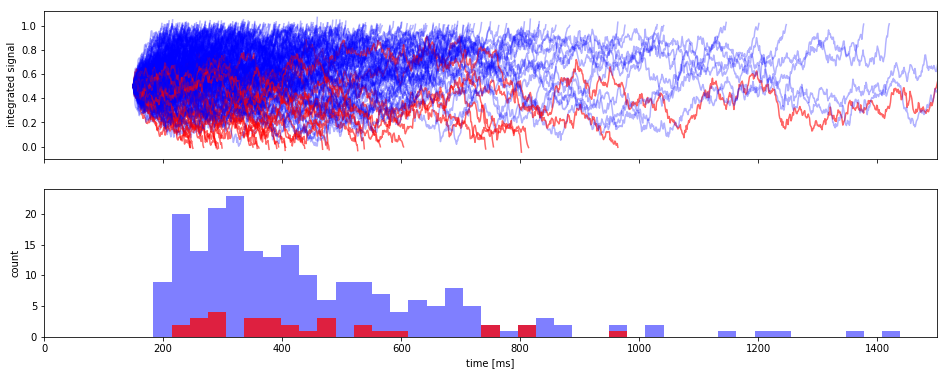

In [282]:
# first, some parameters that give us reasonable behavior
a = 1
z = a/2
t = 150
v = 0.00125 
vs = 0.025

n_trials = 250

# set up the figures
f, ss = plt.subplots(2,1, figsize=(16,6), sharex=True)
ss[0].set_xlim([0,1500])
ss[1].set_xlim([0,1500])
ss[1].set_xlabel('time [ms]')
ss[0].set_ylabel('integrated signal')
ss[1].set_ylabel('count')

# simulate a bunch of trials
trials = []
for x in range(n_trials):
    trial = DDM_trial(v=v, vs=vs, z=z, t=t, a=a, full_return=True)
    if trial['answer'] == 0:
        ss[0].plot(np.arange(len(trial['trajectory']))+t, trial['trajectory'], alpha=0.3, c='b')
    else:
        ss[0].plot(np.arange(len(trial['trajectory']))+t, trial['trajectory'], alpha=0.6, c='r')  
    trials.append({'answer': trial['answer'], 'rt': trial['rt']}) 

# we now convert the trials list to a dataframe, for easy and unambiguous indexing.
trials = pd.DataFrame(trials)

ss[1].hist(trials[trials['answer']==0]['rt'], alpha=0.5, color='b', bins=np.linspace(0,1500,50))
ss[1].hist(trials[trials['answer']==1]['rt'], alpha=0.75, color='r', bins=np.linspace(0,1500,50));

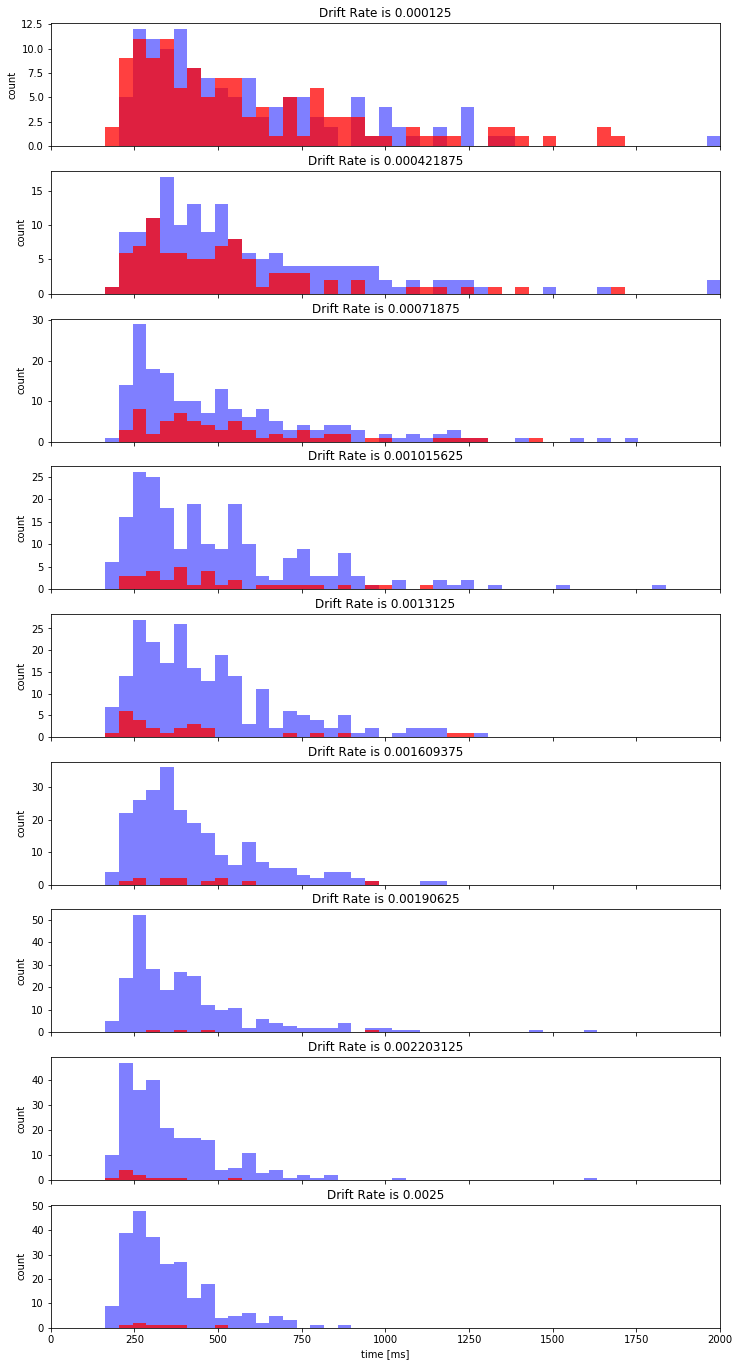

In [281]:
different_vs = np.linspace(0.000125, 0.0025, 9)

basic_trials = [pd.DataFrame([DDM_trial(v=v, vs=vs, z=z, t=t, a=a, full_return=False) 
                             for x in range(n_trials)]) for v in different_vs]

f, ss = plt.subplots(len(different_vs),1, figsize=(12,24), sharex=True)
for splt in range(len(different_vs)):
    ss[splt].set_xlim([0,2000])
    ss[splt].hist(basic_trials[splt][basic_trials[splt]['answer']==0]['rt'], alpha=0.5, color='b', bins=np.linspace(0,2000,50))
    ss[splt].hist(basic_trials[splt][basic_trials[splt]['answer']==1]['rt'], alpha=0.75, color='r', bins=np.linspace(0,2000,50))
    ss[splt].set_ylabel('count');
    ss[splt].set_title('Drift Rate is ' +str(different_vs[splt]));
ss[-1].set_xlabel('time [ms]')

## Questions on Drift Diffusion Model

**As above:** Answer these questions using separate code or markdown cells, depending on the question. If you want to explain yourself (or answer the questions using text), use a markdown cell for this. 

1. In the above example, we manipulated the drift rate parameter $v$. With which SDT measure, as quantified in the previous section, does this correspond? 

2. With what parameter in the DDM does the other main SDT parameter correspond?

3. What happens with the reaction times of the error trials in the above simulation? And for the correct trials? Did you expect this? What does this tell you about the interpretation of average reaction times?

4. Now, change that other parameter (the answer to question 2) in the same parametric way as the Drift Rate was changed above - do so in a new code block. What do you see happening, and why? Try to draw the link with the SDT trial categories.

5. In the present implementation, we used time in ms. What effect would changing the simulations to occur in seconds have on the parameters $v$ and $z$ in the model? Would they need to change, and if so, how?